## Installation
```
virtualenv -p python3 venv-cattle 
source venv-cattle/bin/activate  
pip install ipykernel  
python -m ipykernel install --user --name=opentree  
pip install jupyter
pip install numpy
pip install pandas
pip install rpy2
jupyter notebook
```

*Need to install vcfR and adegent in R*

In [5]:
%load_ext rpy2.ipython

In [2]:
%%R
setwd("~/Desktop/Lab/Joseline")
inputvcf = "ChrALL.vcf"
inputnames = "SummerGenomics/samplenames.csv"
##input names file generated by running
# python vcf_manip/get_labels_pops.py -m metadata/label_match.csv -i samplenames.txt -o samplenames.csv

library(vcfR)
library(adegenet)

label_map <- read.csv(inputnames)

R[write to console]: 
   *****       ***   vcfR   ***       *****
   This is vcfR 1.12.0 
     browseVignettes('vcfR') # Documentation
     citation('vcfR') # Citation
   *****       *****      *****       *****


R[write to console]: Loading required package: ade4

R[write to console]: Registered S3 method overwritten by 'spdep':
  method   from
  plot.mst ape 

R[write to console]: 
   /// adegenet 2.1.3 is loaded ////////////

   > overview: '?adegenet'
   > tutorials/doc/questions: 'adegenetWeb()' 
   > bug reports/feature requests: adegenetIssues()





In [3]:
%%R 
label_map

                          filename ind_name      pop
1     3592092.sorted.dedup.q20.bam      OG2   ogaden
2     3693376.sorted.dedup.q20.bam      ND1    ndama
3     3592093.sorted.dedup.q20.bam      OG4   ogaden
4     3656921.sorted.dedup.q20.bam      AK2   ankole
5  SRR6936540.sorted.dedup.q20.bam     IND1 indicine
6     3491019.sorted.dedup.q20.bam      OG5   ogaden
7     3546727.sorted.dedup.q20.bam     BOR3    boran
8     3656922.sorted.dedup.q20.bam      AK4   ankole
9     3693379.sorted.dedup.q20.bam      ND3    ndama
10    3546729.sorted.dedup.q20.bam     BOR6    boran
11    3693229.sorted.dedup.q20.bam     KEN6   kenana
12    3546787.sorted.dedup.q20.bam     BOR8    boran
13    3694478.sorted.dedup.q20.bam      ND7    ndama
14    3694657.sorted.dedup.q20.bam     KEN8   kenana
15    3592091.sorted.dedup.q20.bam      OG7   ogaden


Scanning file to determine attributes.
File attributes:
  meta lines: 29
  header_line: 30
  variant count: 1177311
  column count: 24
Meta line 29 read in.
All meta lines processed.
gt matrix initialized.
Character matrix gt created.
  Character matrix gt rows: 1177311
  Character matrix gt cols: 24
  skip: 0
  nrows: 1177311
  row_num: 0
Processed variant: 000200030004000500060007000800090001000011000120001300014000150001600017000180001900020000210002200023000240002500026000270002800029000300003100032000330003400035000360003700038000390004000041000420004300044000450004600047000480004900050000510005200053000540005500056000570005800059000600006100062000630006400065000660006700068000690007000071000720007300074000750007600077000780007900080000810008200083000840008500086000870008800089000900009100092000930009400095000960009700098000990001000001010001020001030001040001050001060001070001080001090001100001110001120001130001140001150001160001170001180001190001200001210001220001230001240001250

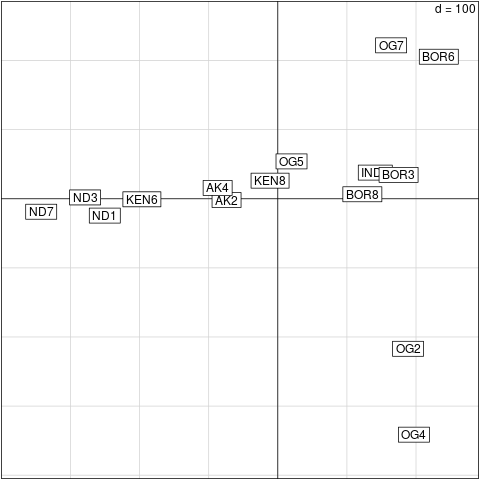

In [6]:
%%R


vcf <- read.vcfR(inputvcf)
mybov <- vcfR2genind(vcf)

indNames(mybov)<-label_map$ind_name
pop(mybov)<-label_map$pop


x.cows <- tab(mybov, freq=TRUE, NA.method="mean")
pca.cows <- dudi.pca(df = x.cows, center = TRUE, scale = FALSE, nf = 3, scannf = FALSE)


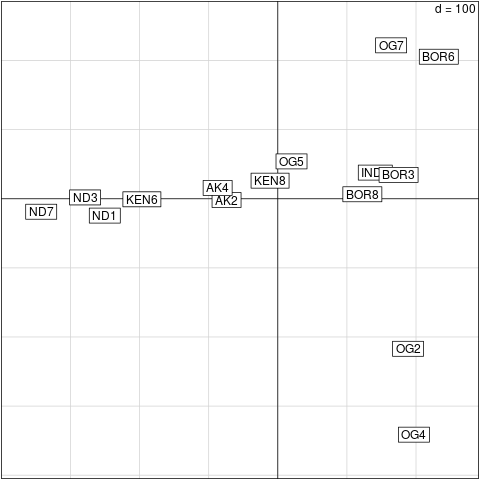

In [7]:
%%R
s.label(pca.cows$li)